In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Set column headers:

In [2]:
headers_gm1 = ['table', 'year', 'doy', 'time',
               'rad_avg', 'rad_max', 'rad_min', 'rad_std',
               'sb_avg', 'sb_max', 'sb_min', 'sb_std',
               'temp1_avg', 'temp1_max', 'temp1_min', 'temp1_std',
               'temp2_avg', 'temp2_max', 'temp2_min', 'temp2_std',
               'temp3_avg', 'temp3_max', 'temp3_min', 'temp3_std',
               'temp4_avg', 'temp4_max', 'temp4_min', 'temp4_std',
               'temp5_avg', 'temp5_max', 'temp5_min', 'temp5_std',
               'batt','b',]
headers_gm2 = ['table', 'year', 'doy', 'time',
               'temp1_avg', 'temp1_max', 'temp1_min', 'temp1_std',
               'temp2_avg', 'temp2_max', 'temp2_min', 'temp2_std',
               'temp3_avg', 'temp3_max', 'temp3_min', 'temp3_std',
               'temp4_avg', 'temp4_max', 'temp4_min', 'temp4_std',
               'temp5_avg', 'temp5_max', 'temp5_min', 'temp5_std',
               'batt','b',]

Open each file:

In [3]:
gm1 = pd.read_csv('data/CR10X_GM1_final_storage_1.dat',
                 header = None, names = headers_gm1)

gm2 = pd.read_csv('data/CR10X_GM2_final_storage_1.dat',
                 header = None, names = headers_gm2)

Pad zeros to time strings

In [4]:
gm1['time_str'] = [('0' * (4 - len(str(gm1.time[i])))) + str(gm1.time[i]) for i in range(gm1.shape[0])]
gm2['time_str'] = [('0' * (4 - len(str(gm2.time[i])))) + str(gm2.time[i]) for i in range(gm2.shape[0])]

In [5]:
for i in range(gm1.shape[0]):
    if gm1.time_str[i] == '2400':
        gm1.time_str[i] = '0000'
for i in range(gm2.shape[0]):
    if gm2.time_str[i] == '2400':
        gm2.time_str[i] = '0000'

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Convert year and day of year to pandas datetime index:

In [6]:
# From: https://stackoverflow.com/questions/34258892/converting-year-and-day-of-year-into-datetime-index-in-pandas

def compose_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
                 seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

gm1['date'] = compose_date(gm1['year'], days=gm1['doy'])
gm2['date'] = compose_date(gm2['year'], days=gm2['doy'])

gm1.index = [pd.to_datetime(str(gm1.date[i])[:-9] + 'T' + str(gm1.time_str[i])) for i in range(gm1.shape[0])]
gm2.index = [pd.to_datetime(str(gm2.date[i])[:-9] + 'T' + str(gm2.time_str[i])) for i in range(gm2.shape[0])]

Get table 102 entires, battery info

In [7]:
gm1_102 = gm1[gm1.table == 102]
gm2_102 = gm2[gm2.table == 102]

Remove entries that are part of "Table 102"

In [8]:
gm1 = gm1[gm1.table != 102]
gm2 = gm2[gm2.table != 102]

Inspect both data series:

In [9]:
gm1.tail()

,table,year,doy,time,rad_avg,rad_max,rad_min,rad_std,sb_avg,sb_max,...,temp4_min,temp4_std,temp5_avg,temp5_max,temp5_min,temp5_std,batt,b,time_str,date
2020-02-12 15:10:00,101,2020,43,1510,-9.3700,-9.0437,-9.7752,0.184,-5.9076,-5.8069,...,-7.3058,0.009,-6.1055,-6.1015,-6.1066,0.002,NaN,NaN,1510,2020-02-12
2020-02-12 15:15:00,101,2020,43,1515,-8.9315,-8.4953,-9.5780,0.336,-6.0095,-5.9826,...,-7.2757,0.013,-6.0973,-6.0916,-6.1065,0.005,NaN,NaN,1515,2020-02-12
2020-02-12 15:20:00,101,2020,43,1520,-10.1200,-9.7869,-10.4040,0.215,-6.4162,-6.0925,...,-7.2557,0.009,-6.1010,-6.0916,-6.1064,0.004,NaN,NaN,1520,2020-02-12
2020-02-12 15:25:00,101,2020,43,1525,-9.5534,-9.2206,-9.9084,0.236,-6.7033,-6.6493,...,-7.2357,0.013,-6.0921,-6.0867,-6.1015,0.005,NaN,NaN,1525,2020-02-12
2020-02-12 15:30:00,101,2020,43,1530,-9.6601,-8.9519,-10.7450,0.551,-6.6635,-6.5886,...,-7.1959,0.005,-6.0883,-6.0868,-6.0918,0.002,NaN,NaN,1530,2020-02-12


In [10]:
gm2.tail()

,table,year,doy,time,temp1_avg,temp1_max,temp1_min,temp1_std,temp2_avg,temp2_max,...,temp4_min,temp4_std,temp5_avg,temp5_max,temp5_min,temp5_std,batt,b,time_str,date
2020-02-12 14:30:00,101,2020,43,1430,-6.4703,-6.4419,-6.5016,0.023,-8.2364,-8.2303,...,-8.5615,0.002,-7.3564,-7.3511,-7.3612,0.004,NaN,NaN,1430,2020-02-12
2020-02-12 14:35:00,101,2020,43,1435,-6.4163,-6.3823,-6.4668,0.022,-8.1710,-8.1387,...,-8.5564,0.007,-7.3549,-7.3510,-7.3612,0.004,NaN,NaN,1435,2020-02-12
2020-02-12 14:40:00,101,2020,43,1440,-6.3921,-6.2987,-6.4418,0.047,-8.1148,-8.0533,...,-8.5367,0.010,-7.3553,-7.3519,-7.3611,0.004,NaN,NaN,1440,2020-02-12
2020-02-12 14:45:00,101,2020,43,1445,-6.2586,-6.2395,-6.2845,0.010,-8.0146,-7.9929,...,-8.5017,0.005,-7.3515,-7.3473,-7.3526,0.002,NaN,NaN,1445,2020-02-12
2020-02-12 14:50:00,101,2020,43,1450,-6.1865,-6.1548,-6.2395,0.026,-7.9268,-7.8558,...,-8.4860,0.033,-7.3309,-7.3117,-7.3523,0.014,NaN,NaN,1450,2020-02-12


***
### Plot:

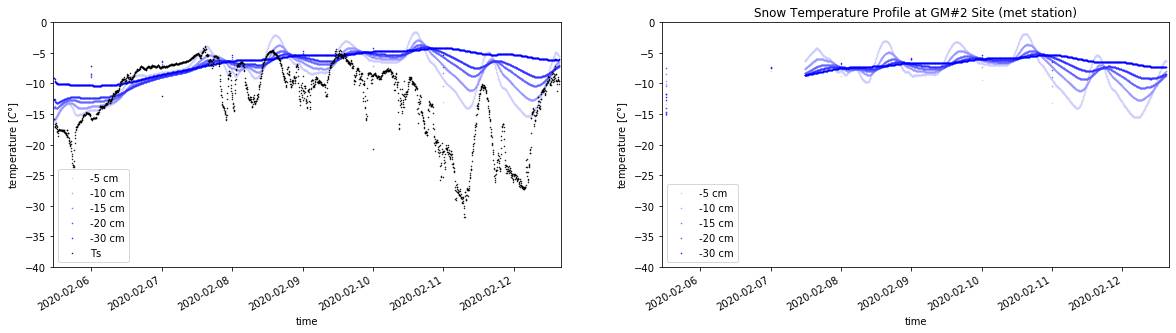

In [11]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(20,5))

# GM 1
startdate = pd.datetime(2020,2,5,11,0)
enddate = pd.datetime(2020,2,12,16,0)

gm1.temp1_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c=[0.8,0.8,1], label='-5 cm')
gm1.temp2_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c=[0.6,0.6,1], label='-10 cm')
gm1.temp3_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c=[0.4,0.4,1], label='-15 cm')
gm1.temp4_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c=[0.2,0.2,1], label='-20 cm')
gm1.temp5_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c=[0,0,1], label='-30 cm')
gm1.rad_avg.plot(ax=ax1, linestyle='none', marker='.', markersize=1, c='k', label='Ts')
ax1.set_ylim((-40,0))
ax1.set_xlim((startdate,enddate))
ax1.legend()
ax1.set_ylabel('temperature [$C\degree$]')
ax1.set_xlabel('time')
ax2.set_title('Snow Temperature Profile at GM#1 Site')


# GM 2
startdate = pd.datetime(2020,2,5,11,0)
enddate = pd.datetime(2020,2,12,16,0)

gm2.temp1_avg.plot(ax=ax2, linestyle='none', marker='.', markersize=1, c=[0.8,0.8,1], label='-5 cm')
gm2.temp2_avg.plot(ax=ax2, linestyle='none', marker='.', markersize=1, c=[0.6,0.6,1], label='-10 cm')
gm2.temp3_avg.plot(ax=ax2, linestyle='none', marker='.', markersize=1, c=[0.4,0.4,1], label='-15 cm')
gm2.temp4_avg.plot(ax=ax2, linestyle='none', marker='.', markersize=1, c=[0.2,0.2,1], label='-20 cm')
gm2.temp5_avg.plot(ax=ax2, linestyle='none', marker='.', markersize=1, c=[0,0,1], label='-30 cm')
ax2.set_ylim((-40,0))
ax2.set_xlim((startdate,enddate))
ax2.legend()
ax2.set_ylabel('temperature [$C\degree$]')
ax2.set_xlabel('time')
ax2.set_title('Snow Temperature Profile at GM#2 Site (met station)')

plt.savefig('SnowTempProfiles.png',dpi=300)

***
### Plot battery info:

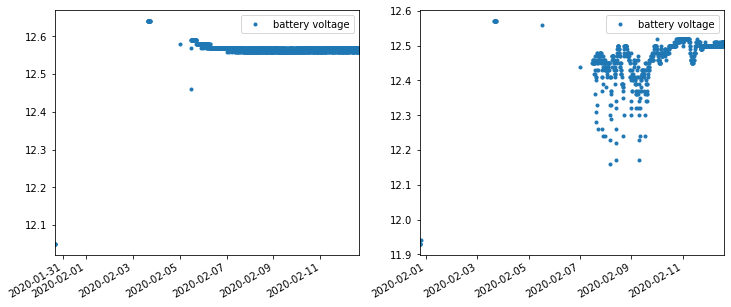

In [12]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(12,5))

# GM 1
startdate = pd.datetime(2020,2,5,11)
enddate = pd.datetime(2020,2,12,11,30)

gm1_102.rad_avg.plot(ax=ax1, linestyle='none', marker='.', label='battery voltage')
#gm1_102.rad_max.plot(ax=ax1, linestyle='none', marker='.', label='b')

#ax1.set_ylim((-20,0))
#ax1.set_xlim((startdate,enddate))
ax1.legend()


# GM 2
startdate = pd.datetime(2020,2,5,12,0)
enddate = pd.datetime(2020,2,5,13,0)


gm2_102.temp1_avg.plot(ax=ax2, linestyle='none', marker='.', label='battery voltage')
#gm2_102.temp1_max.plot(ax=ax2, linestyle='none', marker='.', label='b')

#ax2.set_ylim((-20,0))
#ax2.set_xlim((startdate,enddate))
ax2.legend()

In [13]:
gm2_102.tail()

,table,year,doy,time,temp1_avg,temp1_max,temp1_min,temp1_std,temp2_avg,temp2_max,...,temp4_min,temp4_std,temp5_avg,temp5_max,temp5_min,temp5_std,batt,b,time_str,date
2020-02-12 14:10:00,102,2020,43,1410,12.50,3756.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410,2020-02-12
2020-02-12 14:20:00,102,2020,43,1420,12.50,3756.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1420,2020-02-12
2020-02-12 14:30:00,102,2020,43,1430,12.50,3756.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430,2020-02-12
2020-02-12 14:40:00,102,2020,43,1440,12.51,3756.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440,2020-02-12
2020-02-12 14:50:00,102,2020,43,1450,12.50,3756.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450,2020-02-12
